# Sudhiksha 24BAD117 - Experiment 3

06.02.2026 \
Regression and Optimization (Multi Linear and Polynomial regression)



# **SCENARIO 1 – MULTILINEAR REGRESSION**


The student performance dataset contains information about academic, behavioral, and lifestyle factors that influence final exam scores.

Input Features: Study hours per day, attendance percentage, parental education level, test preparation course, and sleep hours \
Target Variable: Final exam score (average of math, reading, and writing)

This experiment uses Multilinear Regression, which predicts a continuous value using multiple input features.The dataset is preprocessed by encoding categorical variables, handling missing values, and applying feature scaling.
The data is then divided into training and testing sets, and the regression model is trained to predict student performance.Regularization techniques such as Ridge and Lasso are applied to improve accuracy and reduce overfitting.

MSE: 208.15
RMSE: 14.43
R² Score: 0.029

Feature Coefficients:
 study_hours    0.475639
attendance    -0.384698
parent_edu    -1.040433
test_prep     -3.785031
sleep_hours    0.874501
dtype: float64

Ridge R²: 0.029021219491981
Lasso R²: 0.029857874081574143


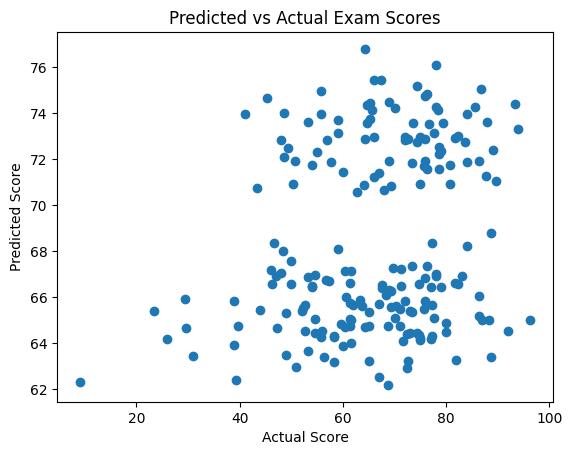

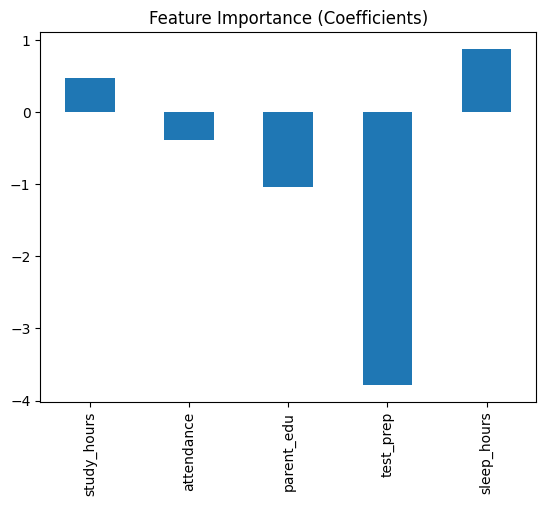

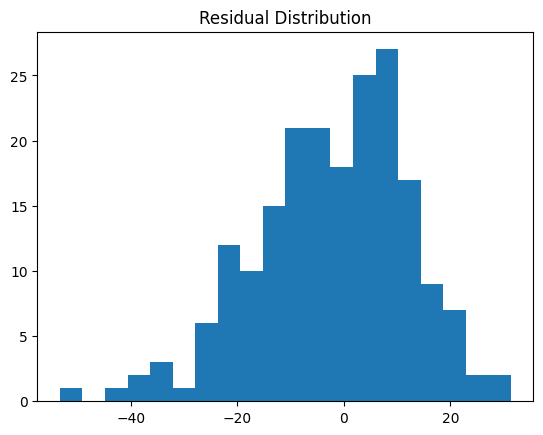

In [ ]:
# Sudhiksha 24BAD117
# SCENARIO 1 – MULTILINEAR REGRESSION

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


df_students = pd.read_csv("StudentsPerformance.csv")

label_cols = ["parental level of education", "test preparation course"]
le = LabelEncoder()
for col in label_cols:
    df_students[col] = le.fit_transform(df_students[col])

df_students["final_score"] = (
    df_students["math score"] +
    df_students["reading score"] +
    df_students["writing score"]
) / 3

np.random.seed(0)
df_students["study_hours"] = np.random.uniform(1, 6, len(df_students))
df_students["attendance"] = np.random.uniform(60, 100, len(df_students))
df_students["sleep_hours"] = np.random.uniform(4, 9, len(df_students))


X = df_students[[
    "study_hours",
    "attendance",
    "parental level of education",
    "test preparation course",
    "sleep_hours",
]]

y = df_students["final_score"]

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


coefficients = pd.Series(model_lr.coef_, index=[
    "study_hours", "attendance", "parent_edu", "test_prep", "sleep_hours"
])
print("\nFeature Coefficients:\n", coefficients)

# Ridge and Lasso optimization
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print("\nRidge R²:", r2_score(y_test, ridge.predict(X_test)))
print("Lasso R²:", r2_score(y_test, lasso.predict(X_test)))

# Predicted vs Actual
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

# Coefficient comparison
plt.figure()
coefficients.plot(kind="bar")
plt.title("Feature Importance (Coefficients)")
plt.show()

# Residual distribution
residuals = y_test - y_pred
plt.figure()
plt.hist(residuals, bins=20)
plt.title("Residual Distribution")
plt.show()



# **SCENARIO 2 – POLYNOMIAL REGRESSION**


The Auto MPG dataset contains vehicle engine details used to predict fuel efficiency.

Input Feature: Engine horsepower \
Target Variable: Miles per gallon (MPG)

This experiment uses Polynomial Regression, which models non-linear relationships between input and output variables. Polynomial features of different degrees are generated, scaled, and divided into training and testing data. Separate regression models are trained for each polynomial degree to predict fuel efficiency.

Degree 2 -> MSE: 13.76, RMSE: 3.71, R²: 0.744
Degree 3 -> MSE: 13.81, RMSE: 3.72, R²: 0.743
Degree 4 -> MSE: 14.12, RMSE: 3.76, R²: 0.737

Ridge Polynomial R²: 0.7434006443586285


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


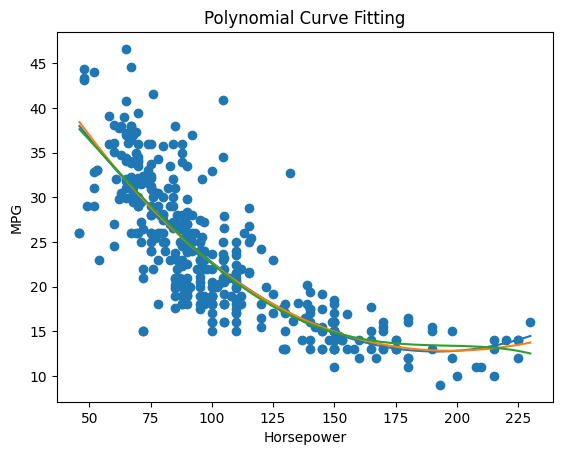

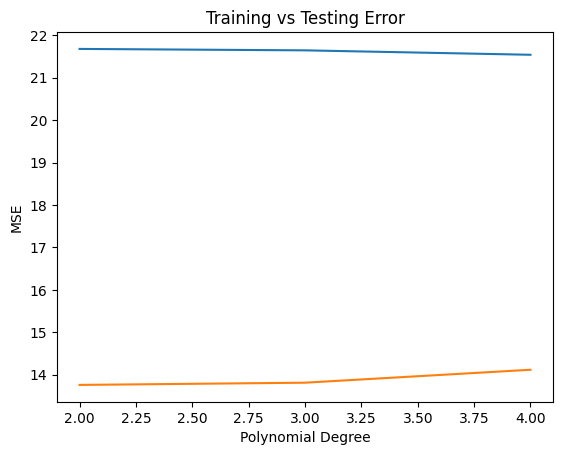

In [ ]:
# SUDHIKSHA 24BAD117
# SCENARIO 2 – POLYNOMIAL REGRESSION

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


df_auto = pd.read_csv("auto-mpg.csv")
df_auto["horsepower"] = pd.to_numeric(df_auto["horsepower"], errors="coerce")

hp_imputer = SimpleImputer(strategy="mean")
df_auto[["horsepower"]] = hp_imputer.fit_transform(df_auto[["horsepower"]])
X_hp = df_auto[["horsepower"]]
y_mpg = df_auto["mpg"]


scaler = StandardScaler()
X_hp_scaled = scaler.fit_transform(X_hp)

X_train, X_test, y_train, y_test = train_test_split(
    X_hp_scaled, y_mpg, test_size=0.2, random_state=42
)

degrees = [2, 3, 4]

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression().fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Degree {d} -> MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")


poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=1.0).fit(X_train_poly, y_train)
print("\nRidge Polynomial R²:", r2_score(y_test, ridge.predict(X_test_poly)))


# Polynomial curve plot
plt.figure()
plt.scatter(X_hp, y_mpg)

x_range = np.linspace(X_hp.min(), X_hp.max(), 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    model = LinearRegression().fit(poly.fit_transform(X_hp_scaled), y_mpg)
    y_curve = model.predict(poly.transform(x_range_scaled))
    plt.plot(x_range, y_curve)

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Curve Fitting")
plt.show()

# Training vs Testing error
plt.figure()
train_errors, test_errors = [], []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression().fit(X_train_poly, y_train)

    train_errors.append(mean_squared_error(y_train, model.predict(X_train_poly)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test_poly)))

plt.plot(degrees, train_errors)
plt.plot(degrees, test_errors)
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Training vs Testing Error")
plt.show()

